In [1]:
# Import the python package for handling data frames     Grade: 0.5
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_outlier_max(series):
    works_q1, works_q3 = series.quantile([0.25, 0.75])

    outlier_max = works_q3+(works_q3-works_q1)*1.5
    return outlier_max
    

# Load data

In [2]:
# Read the CSV file into a data frame variable df_1 and display the first rows.  Grade: 1
df = pd.read_csv("GoodReads Authors/final_dataset.csv")

df.head()

,authorid,name,workcount,fan_count,gender,image_url,about,born,died,influence,average_rate,rating_count,review_count,website,twitter,genre,original_hometown,country,latitude,longitude
0,8409092,Jason Wallace,2,13,male,https://images.gr-assets.com/authors/148926684...,Jason Wallace is related to Tolkien and a desc...,NaN,NaN,NaN,3.74,1028,175,NaN,NaN,NaN,Cheltenham,United Kingdom,51.90006,-2.07972
1,5796406,Rosan Hollak,4,0,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,3.73,15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8421525,Nanna Foss,6,156,female,https://images.gr-assets.com/authors/140908587...,Danish YA writer. <br /><br />I make up storie...,NaN,NaN,NaN,4.35,1172,205,http://www.nannafoss.dk,NaN,"fantasy,fiction,paranormal",NaN,NaN,NaN,NaN
3,158146,Terri Savelle Foy,23,125,female,https://images.gr-assets.com/authors/147569460...,"For years, Terri Savelle Foy’s life was averag...",NaN,NaN,NaN,4.56,1054,151,http://www.terri.com,terrisavellefoy,"religion and spirituality,self help,spirituality",NaN,NaN,NaN,NaN
4,15340731,Vishwas Nangare Patil,1,127,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,4.15,725,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209517 entries, 0 to 209516
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   authorid           209517 non-null  int64  
 1   name               209517 non-null  object 
 2   workcount          209517 non-null  int64  
 3   fan_count          209517 non-null  int64  
 4   gender             209517 non-null  object 
 5   image_url          209517 non-null  object 
 6   about              86724 non-null   object 
 7   born               31230 non-null   object 
 8   died               12488 non-null   object 
 9   influence          7882 non-null    object 
 10  average_rate       209517 non-null  float64
 11  rating_count       209517 non-null  int64  
 12  review_count       209517 non-null  int64  
 13  website            58320 non-null   object 
 14  twitter            35122 non-null   object 
 15  genre              73983 non-null   object 
 16  or

In [4]:
authors_df = df[["authorid", "name", "workcount", "fan_count", "gender", "average_rate", "rating_count", "review_count", "genre", "country"]]
authors_df = authors_df[authors_df["name"] != "NOT A BOOK"]

In [5]:

authors_df.describe()

,authorid,workcount,fan_count,average_rate,rating_count,review_count
count,2.095160e+05,209516.000000,209516.000000,209516.000000,2.095160e+05,209516.000000
mean,4.694191e+06,29.522146,166.365963,3.861704,7.235912e+03,514.533038
std,5.404031e+06,762.313601,3221.994867,0.459039,1.088759e+05,4541.818189
min,4.000000e+00,0.000000,-18.000000,0.000000,0.000000e+00,0.000000
25%,3.098665e+05,3.000000,1.000000,3.670000,6.500000e+01,8.000000
50%,2.892158e+06,8.000000,6.000000,3.900000,2.970000e+02,37.000000
75%,7.074212e+06,21.000000,33.000000,4.110000,1.308000e+03,162.000000
max,2.017882e+07,186551.000000,709826.000000,8.070000,2.451111e+07,579250.000000


In [6]:
# outlier_min = (21-3)*1.5+21
# print(f"Outlier minimum threshold: {outlier_min}")
# authors_df = authors_df[authors_df["workcount"] <= outlier_min]
# authors_df

In [7]:
# authors_df[authors_df["fan_count"] > 1000]

In [8]:
(len(authors_df[authors_df["workcount"]<50]) / len(authors_df))*100


89.88430477863267

<Axes: xlabel='gender', ylabel='workcount'>

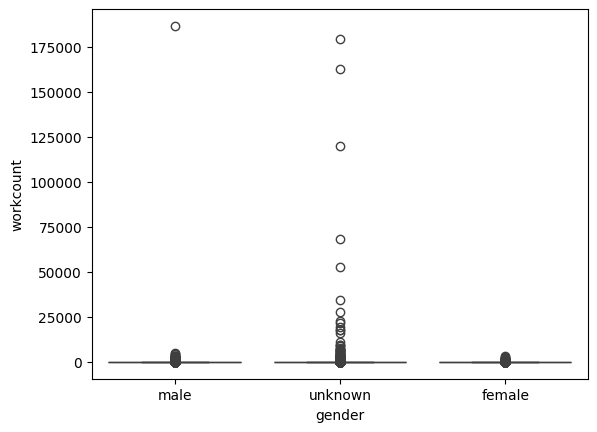

In [9]:
sns.boxplot(data=authors_df, x="gender", y="workcount")

<Axes: xlabel='gender', ylabel='workcount'>

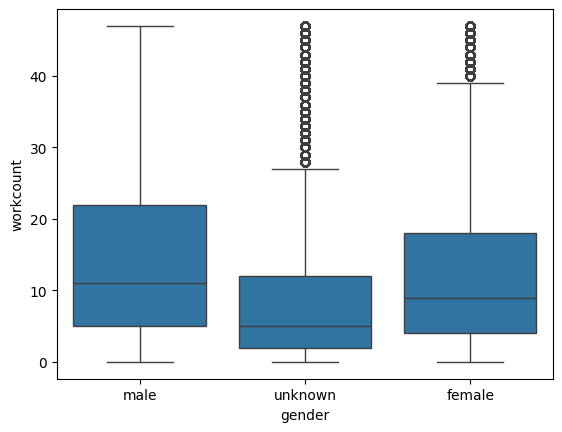

In [10]:
# works_q1, works_q3 = authors_df["workcount"].quantile([0.25, 0.75])
# print(works_q1)
# print(works_q3)

# outlier_max = works_q3+(works_q3-works_q1)*1.5
outlier_max = get_outlier_max(authors_df["workcount"])
authors_df = authors_df[authors_df["workcount"] < outlier_max]

sns.boxplot(data=authors_df, x="gender", y="workcount")


In [ ]:
sns.histplot(data=authors_df, x="fan_count", color="skyblue")

# fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# sns.histplot(data=authors_df, x="workcount", color="skyblue", ax=axs[0, 0])
# sns.histplot(data=authors_df, x="fan_count", color="olive", ax=axs[0, 1])
# sns.histplot(data=authors_df, x="rating_count", color="gold", ax=axs[1, 0])
# sns.histplot(data=authors_df, x="review_count", color="teal", ax=axs[1, 1])

<Axes: xlabel='fan_count', ylabel='Count'>

Error in callback <function _draw_all_if_interactive at 0x0000019B4108AA20> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

<Axes: xlabel='gender', ylabel='fan_count'>

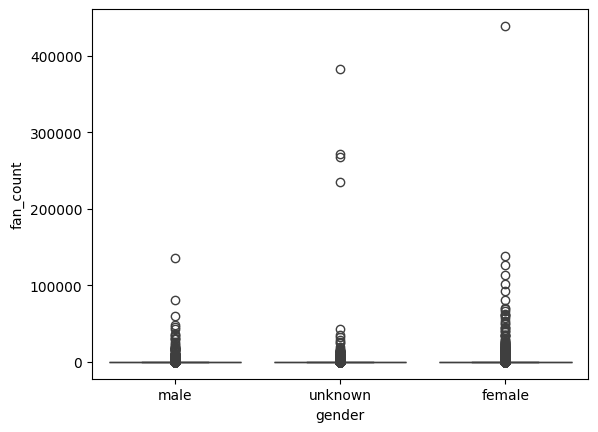

In [38]:
sns.boxplot(data=authors_df, x="gender", y="fan_count")

In [54]:
fan_outlier_max = get_outlier_max(authors_df["fan_count"])
print(fan_outlier_max)


56.0


<Axes: xlabel='gender', ylabel='fan_count'>

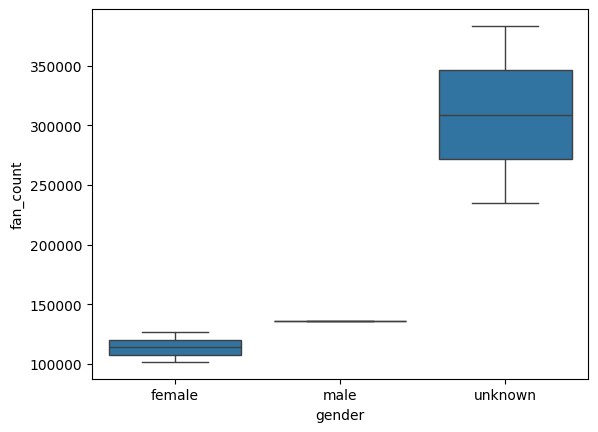

In [55]:

outliers = authors_df[authors_df["fan_count"] > 100000] #.sort_values(by="fan_count", ascending=False)
sns.boxplot(data=outliers, x="gender", y="fan_count")

<Axes: xlabel='gender', ylabel='fan_count'>

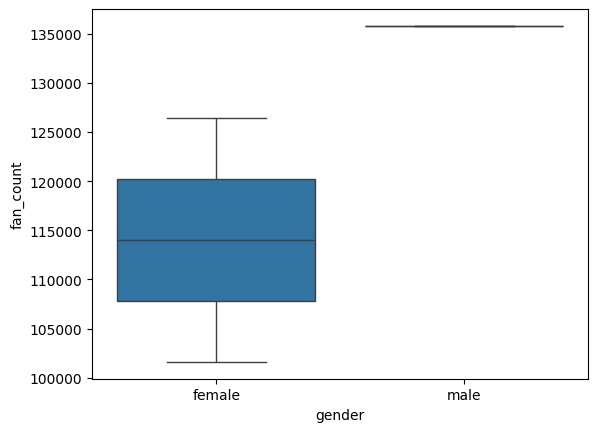

In [59]:

outliers2 = outliers[outliers["gender"] != "unknown"] #.sort_values(by="fan_count", ascending=False)
sns.boxplot(data=outliers2, x="gender", y="fan_count")

<Axes: xlabel='gender', ylabel='rating_count'>

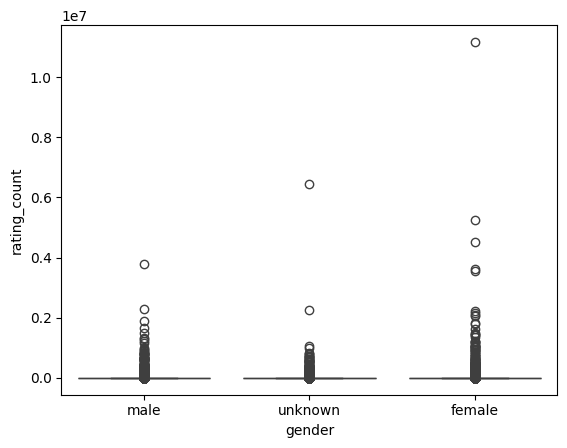

In [39]:
sns.boxplot(data=authors_df, x="gender", y="rating_count")

<Axes: xlabel='gender', ylabel='review_count'>

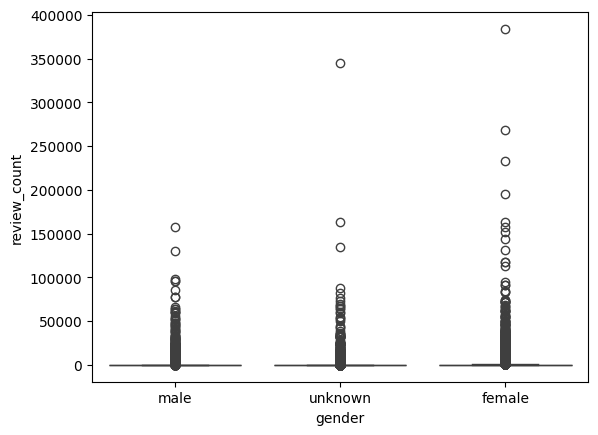

In [40]:
sns.boxplot(data=authors_df, x="gender", y="review_count")

In [ ]:
# fan_outlier_min = (33-1)*1.5+33
# print(f"fan_count outlier minimum: {fan_outlier_min}")
# authors_df[authors_df["fan_count"] > fan_outlier_min].sort_values(by="fan_count", ascending=False)

fan_count outlier minimum: 81.0


,authorid,name,workcount,fan_count,gender,average_rate,rating_count,review_count,genre,country
200864,3389,Stephen King,1653,709826,male,4.04,13815580,541869,"fiction,horror,literature,mystery and thrillers",United States
200932,4039811,Veronica Roth,45,438983,female,4.06,5241546,268756,"fiction,young adult",NaN
207380,23470,Bill Gates,17,383245,unknown,3.82,8319,396,"business,non fiction,science",United States
202000,5430144,Colleen Hoover,55,342187,female,4.25,2038011,221778,"fiction,mystery and thrillers,romance",NaN
201226,15872,Rick Riordan,177,298903,male,4.32,7998305,314878,"children,fantasy,fiction",United States
...,...,...,...,...,...,...,...,...,...,...
63618,3492473,Tracy Krauss,48,82,female,4.09,330,127,"mystery and thrillers,religion and spiritualit...",Canada
21707,7824070,Victoria J. Coe,4,82,unknown,4.02,841,239,children,NaN
8017,8337329,Cody McClain Brown,3,82,male,4.06,1408,176,"biographies and memoirs,comedy,travel",United States
149486,4169,Stephen Levine,40,82,unknown,4.16,3347,301,"religion and spirituality,spirituality",United States


In [13]:
# sns.boxplot(data=authors_df, x="gender", y="fan_count")


In [14]:
authors_df.iloc[::, 1::]

,name,workcount,fan_count,gender,average_rate,rating_count,review_count,genre,country
0,Jason Wallace,2,13,male,3.74,1028,175,NaN,United Kingdom
1,Rosan Hollak,4,0,unknown,3.73,15,1,NaN,NaN
2,Nanna Foss,6,156,female,4.35,1172,205,"fantasy,fiction,paranormal",NaN
3,Terri Savelle Foy,23,125,female,4.56,1054,151,"religion and spirituality,self help,spirituality",NaN
4,Vishwas Nangare Patil,1,127,unknown,4.15,725,43,NaN,NaN
...,...,...,...,...,...,...,...,...,...
209512,Rosanne Bittner,75,482,female,4.33,13066,1310,"history,romance",United States
209513,Richard Bandler,95,242,unknown,4.01,8053,468,NaN,NaN
209514,Norman Bodek,20,7,male,4.06,1594,65,"business,spirituality",United States
209515,Augusto Cury,78,253,unknown,3.82,10450,681,"self help,spirituality",Macao


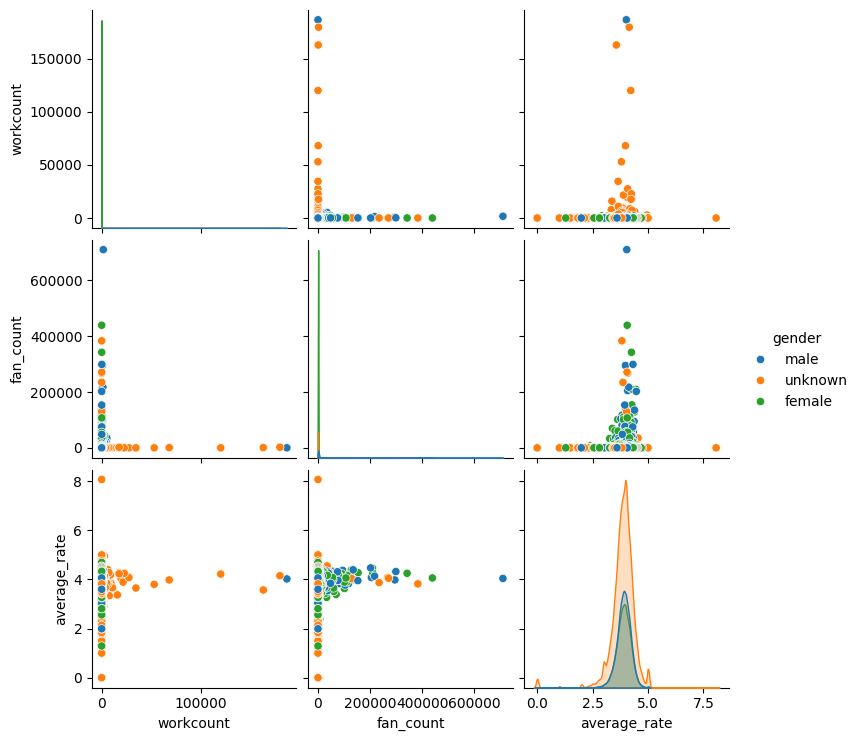

In [15]:
tmp = authors_df[["name", "gender", "workcount", "fan_count", "average_rate"]]
sns.pairplot(data=tmp, hue="gender")

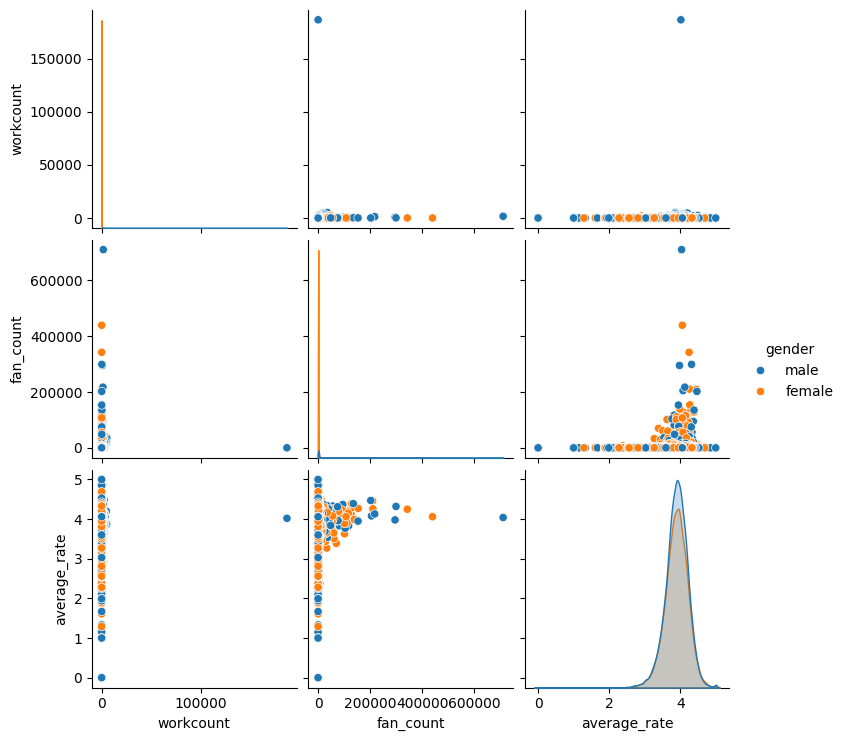

In [31]:
tmp2 = tmp[tmp["gender"] != "unknown"]
sns.pairplot(data=tmp2, hue="gender")

In [17]:
gender_df = authors_df.groupby(["gender"]).agg({
    'authorid' : 'count',
    'workcount': ['sum', 'median'],
    'fan_count': ['sum', 'median'],
    'average_rate': ['mean', 'median'],
    'review_count': ['sum', 'median']
}).reset_index(names=['gender'])

gender_df.columns = gender_df.columns.map(' '.join)
gender_df = gender_df.rename(columns={'gender ' : 'gender', 'authorid count' : 'count'})
gender_df

,gender,count,workcount sum,workcount median,fan_count sum,fan_count median,average_rate mean,average_rate median,review_count sum,review_count median
0,female,41761,1045086,11.0,17407479,46.0,3.886882,3.90,50180250,170.0
1,male,46783,2147976,15.0,11847717,19.0,3.890911,3.91,37397055,84.0
2,unknown,120972,2992300,6.0,5601135,2.0,3.841718,3.89,20225599,15.0


In [18]:
authors_df["country"].unique()

def count_female(series):
    return (series == "female").sum()
def count_male(series):
    return (series == "male").sum()
def count_unknown(series):
    return (series == "unknown").sum()


country_df = authors_df.groupby(["country"]).agg({
    'authorid' : 'count',
    'workcount': ['sum', 'median'],
    'fan_count': ['sum', 'median'],
    'average_rate': ['mean', 'median'],
    'review_count': ['sum', 'median'],
    'gender': [count_female, count_male, count_unknown]
}).reset_index(names=['country'])

country_df.columns = country_df.columns.map(' '.join)
country_df = country_df.rename(columns={'country ' : 'country', 
                                        'authorid count' : 'count', 
                                        'gender count_female': 'count female', 
                                        'gender count_male': 'count male', 
                                        'gender count_unknown': 'count unknown' })
country_df.sort_values(by="count", ascending=False)

,country,count,workcount sum,workcount median,fan_count sum,fan_count median,average_rate mean,average_rate median,review_count sum,review_count median,count female,count male,count unknown
204,United States,19444,766053,13.0,13156628,44.0,3.929823,3.94,36213708,192.0,7994,8724,2726
203,United Kingdom,5147,314884,21.0,2033673,38.0,3.884084,3.89,8429566,185.0,1612,2813,722
33,Canada,1528,41071,13.0,451785,39.0,3.871257,3.87,1668142,163.0,660,616,252
63,France,1104,92866,39.0,240368,22.0,3.833795,3.84,745991,103.5,226,780,98
70,Germany,1028,76085,26.0,205328,18.0,3.873084,3.89,667421,87.0,288,636,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Saint Barthélemy,1,29,29.0,288,288.0,4.030000,4.03,289,289.0,0,1,0
175,Solomon Islands,1,29,29.0,130,130.0,4.060000,4.06,186,186.0,1,0,0
36,Chad,1,21,21.0,7,7.0,3.460000,3.46,63,63.0,0,1,0
164,Saint Martin,1,8,8.0,43,43.0,3.600000,3.60,213,213.0,1,0,0


In [19]:
# genres are comma separated lists. this will require some complicated wrangling to graph
print(authors_df["genre"].unique())

[nan 'fantasy,fiction,paranormal'
 'religion and spirituality,self help,spirituality' ...
 'chemistry,non fiction,science'
 'biographies and memoirs,children,middle grade'
 'religion and spirituality,survival']


In [20]:
tmp_df = authors_df[authors_df["genre"].notna()]
tmp_df["genre"] = tmp_df["genre"].map(lambda s: pd.Series(str(s).split(',')))
tmp_df = tmp_df.replace().explode(column="genre")
genre_df = tmp_df.groupby(["genre"]).agg({
    'authorid' : 'count',
    'workcount': ['sum', 'median'],
    'fan_count': ['sum', 'median'],
    'average_rate': ['mean', 'median'],
    'review_count': ['sum', 'median'],
    'gender': [count_female, count_male, count_unknown]
}).reset_index(names=['genre'])

genre_df.columns = genre_df.columns.map(' '.join)
genre_df = genre_df.rename(columns={'genre ' : 'genre', 
                                    'authorid count' : 'count',
                                    'gender count_female': 'count female', 
                                    'gender count_male': 'count male', 
                                    'gender count_unknown': 'count unknown' })
genre_df.sort_values(by="count", ascending=False)

C:\Users\emmaf\AppData\Local\Temp\ipykernel_10632\1700187122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df["genre"] = tmp_df["genre"].map(lambda s: pd.Series(str(s).split(',')))
C:\Users\emmaf\AppData\Local\Temp\ipykernel_10632\1700187122.py:3: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  tmp_df = tmp_df.replace().explode(column="genre")


,genre,count,workcount sum,workcount median,fan_count sum,fan_count median,average_rate mean,average_rate median,review_count sum,review_count median,count female,count male,count unknown
499,fiction,24087,977159,14.0,17377893,57.0,3.858427,3.86,46576112,185.0,10322,10239,3526
1137,romance,13089,449622,17.0,8807767,127.0,3.930240,3.95,20790171,313.0,10259,661,2169
614,history,10480,318720,14.0,2731385,32.0,3.914554,3.92,9038570,127.0,3935,5074,1471
914,non fiction,10290,321773,11.0,2904961,23.0,3.922228,3.93,8145801,99.0,3251,5234,1805
869,mystery and thrillers,9889,318419,13.0,5619730,59.0,3.876580,3.89,15741760,201.0,3724,4070,2095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,author,1,1,1.0,30,30.0,3.370000,3.37,52,52.0,0,1,0
109,austrian economics,1,10,10.0,4,4.0,4.060000,4.06,19,19.0,0,1,0
711,leadership development,1,1,1.0,6,6.0,3.670000,3.67,4,4.0,0,1,0
712,leadership expertise,1,65,65.0,19,19.0,4.080000,4.08,322,322.0,0,1,0


# Graphs

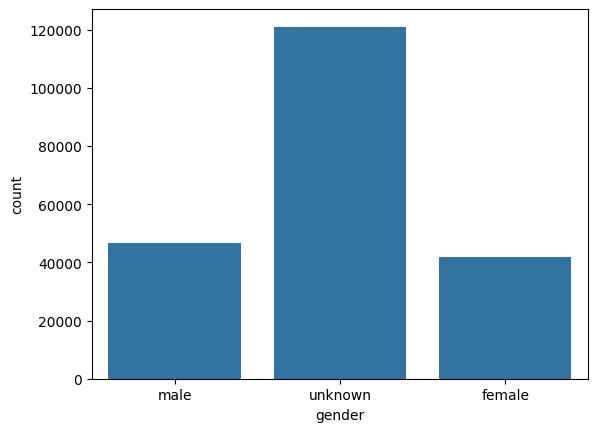

In [21]:
sns.countplot(authors_df, x="gender")
plt.show()

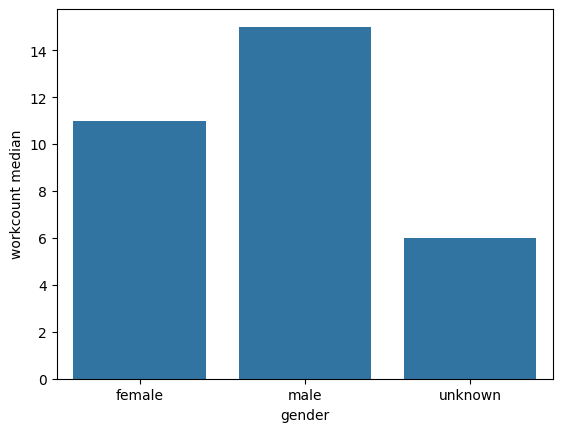

In [22]:
sns.barplot(gender_df, x="gender", y="workcount median")
plt.show()

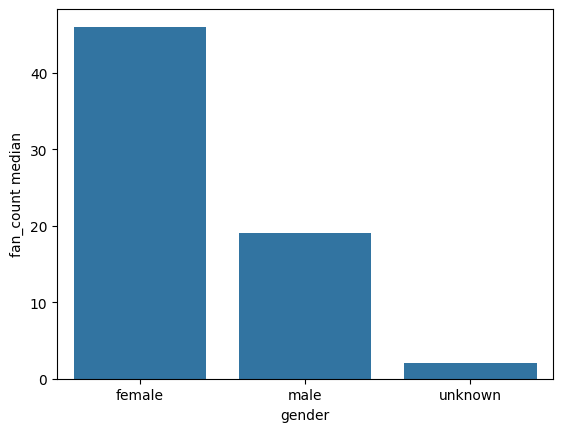

In [23]:
sns.barplot(gender_df, x="gender", y="fan_count median")
plt.show()

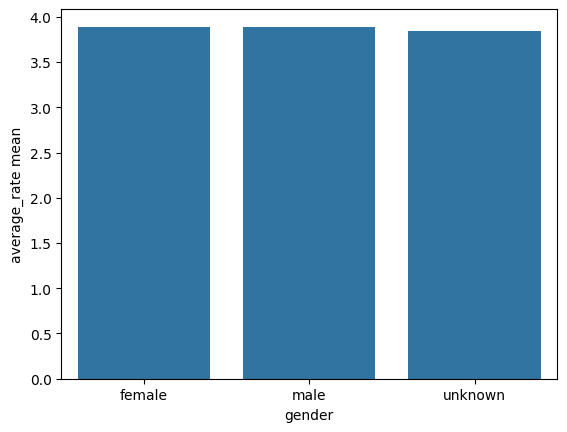

In [24]:
sns.barplot(gender_df, x="gender", y="average_rate mean")
plt.show()

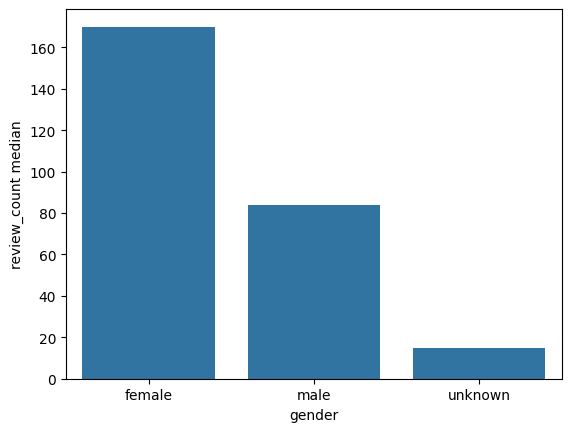

In [25]:
sns.barplot(gender_df, x="gender", y="review_count median")
plt.show()

In [26]:
# max = len(authors_df)
# sample_size = int(np.round(max / 10))

# selection = np.random.randint(0, max-1, size = sample_size)

# print(selection)

In [27]:
max = len(authors_df)
sample_size = int(np.round(max / 10))

means_boot_samples = []
for i in range(1000):
                boot_sample = authors_df.sample(sample_size)
                means_boot_samples.append(boot_sample["workcount"].mean())
        
np.mean(means_boot_samples)

29.640530498281787

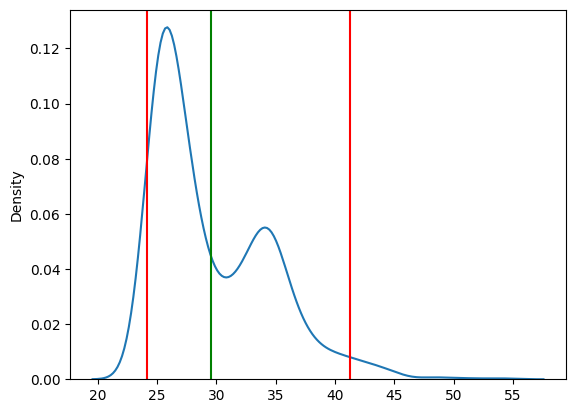

In [28]:
conf_int = np.percentile(means_boot_samples, [2.5, 97.5]) # The middle 95% interval
conf_int

import seaborn as sns
sns.kdeplot(means_boot_samples)

actual_mean = authors_df["workcount"].mean()

plt.axvline(actual_mean, color="green")

for endpoint in conf_int:
    plt.axvline(endpoint, color='red')

In [29]:
a = 6*6*6
print(a)

216


In [30]:
import numpy as np

a = 6
b = 8
c = 10
s = (a+b+c)/2
area = np.sqrt(s*(s-a)*(s-b)*(s-c))
r = a*b*c/(4*area)
print(r) 

5.0
